# Day 8: Agenda

- Feature Engineering
    - Vectorization
    - Encoding
- Time Series Concepts
- Machine Learning Basics/Theory
- Other models/Model Selection
- Model hyper-param tuning

In [5]:
# nominal : not ordered
origin_vect = {'US': 1, 'Europe': 2, 'Asia': 3}
origin_vect2 = {'US': '100', 'Europe': '001', 'Asia': '010'}
cities = {
    'Dehradun': 0,
    'Lucknow': 1, 
    'Bhopal': 2,
    'Indore': 3,
    'Ahmedabad': 4
    'Pune': 5,
    'Kochi': 6,
    'Kolkata': 7
         }

In [6]:
# ordinal: order inherent
medals_vect = {'Silver': 1, 'Bronze': 2, 'Gold': 3}

In [ ]:
# 1. Convert origin to numeric
# Add origin(converted) to X

In [12]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

mpg = pd.read_csv('data/auto-mpg.csv')
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [7]:
mpg.origin.map(origin_vect)

0      1
1      1
2      1
3      1
4      1
      ..
387    1
388    2
389    1
390    1
391    1
Name: origin, Length: 392, dtype: int64

In [8]:
mpg.origin = mpg.origin.map(origin_vect)
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_extraction

In [14]:
mpg.origin

0          US
1          US
2          US
3          US
4          US
        ...  
387        US
388    Europe
389        US
390        US
391        US
Name: origin, Length: 392, dtype: object

In [18]:
mpg[['origin','name']]
mpg['origin']
mpg[['origin']]

,origin
0,US
1,US
2,US
3,US
4,US
...,...
387,US
388,Europe
389,US
390,US


In [11]:
ohe = OneHotEncoder()

In [25]:
encoded = ohe.fit_transform(mpg[['origin']])
encoded

<392x3 sparse matrix of type '<class 'numpy.float64'>'
	with 392 stored elements in Compressed Sparse Row format>

In [27]:
encoded = encoded.toarray()

In [35]:
mpg['origin'][15:25]

15        US
16        US
17        US
18      Asia
19    Europe
20    Europe
21    Europe
22    Europe
23    Europe
24        US
Name: origin, dtype: object

In [34]:
encoded[15:25]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
ohe.get_feature_names()

array(['x0_Asia', 'x0_Europe', 'x0_US'], dtype=object)

In [37]:
encoded.shape

(392, 3)

In [38]:
mpg.shape

(392, 9)

In [11]:
ohe = OneHotEncoder()

In [25]:
encoded = ohe.fit_transform(mpg[['origin']])
encoded

<392x3 sparse matrix of type '<class 'numpy.float64'>'
	with 392 stored elements in Compressed Sparse Row format>

In [27]:
encoded = encoded.toarray()

In [41]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names())
encoded_df

,x0_Asia,x0_Europe,x0_US
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
387,0.0,0.0,1.0
388,0.0,1.0,0.0
389,0.0,0.0,1.0
390,0.0,0.0,1.0


In [43]:
pd.concat([mpg, encoded_df], axis=1)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,x0_Asia,x0_Europe,x0_US
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu,0.0,0.0,1.0
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320,0.0,0.0,1.0
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite,0.0,0.0,1.0
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst,0.0,0.0,1.0
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl,0.0,0.0,1.0
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,0.0,1.0,0.0
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage,0.0,0.0,1.0
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger,0.0,0.0,1.0


In [46]:
pd.get_dummies(mpg.drop('name', axis=1), drop_first=True)

,mpg,cyl,displ,hp,weight,accel,yr,origin_Europe,origin_US
0,18.0,8,307.0,130,3504,12.0,70,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,0,1
388,44.0,4,97.0,52,2130,24.6,82,1,0
389,32.0,4,135.0,84,2295,11.6,82,0,1
390,28.0,4,120.0,79,2625,18.6,82,0,1


### Aside: Lambdas

In [76]:
def parser(date):
    return datetime.datetime.strptime(date, '%d%m...')

In [ ]:
# anonymous, on-the-fly
lambda date: datetime.datetime.strptime(date, '%d%m...')

In [ ]:
def arg_fn():
    ...
    
hof(arg_fn)
hof(lambda :)

num = 2+3
f(2+3)

In [77]:
austin = pd.read_csv('data/austin_weather_data_2010.csv', 
                     parse_dates=[-1])
austin

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00
...,...,...,...,...
8754,51.1,38.1,1.0,2010-12-31 19:00:00
8755,49.0,37.9,1.0,2010-12-31 20:00:00
8756,47.9,37.9,1.0,2010-12-31 21:00:00
8757,46.9,37.9,1.0,2010-12-31 22:00:00


In [78]:
austin.dtypes

Temperature           float64
DewPoint              float64
Pressure              float64
Date           datetime64[ns]
dtype: object

In [79]:
austin.set_index('Date', inplace=True)
austin

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0


In [62]:
austin.index.is_monotonic

True

In [65]:
austin.loc['2010-09':'2010-09']

,Temperature,DewPoint,Pressure
Date,,,
2010-09-01 00:00:00,77.6,69.2,1.0
2010-09-01 01:00:00,76.1,69.4,1.0
2010-09-01 02:00:00,75.3,69.5,1.0
2010-09-01 03:00:00,74.5,69.4,1.0
2010-09-01 04:00:00,73.9,69.3,1.0
...,...,...,...
2010-09-30 19:00:00,77.1,59.9,1.0
2010-09-30 20:00:00,74.3,60.4,1.0
2010-09-30 21:00:00,72.3,60.7,1.0


In [84]:
austin.loc['2010-09-30']['Temperature'].mean()

74.32916666666667

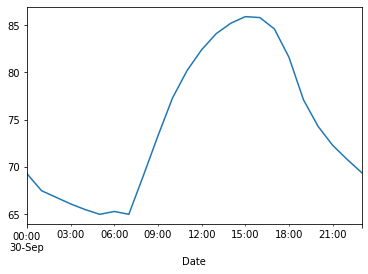

In [82]:
austin.loc['2010-09-30']['Temperature'].plot()

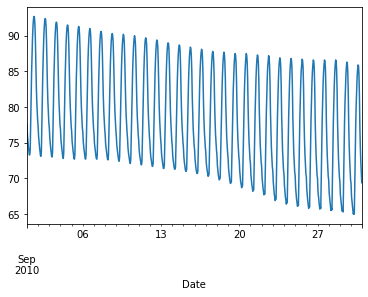

In [70]:
austin.loc['2010-09']['Temperature'].plot()

In [89]:
dailies = austin.resample('D').mean()
dailies

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0
...,...,...,...
2010-12-27,49.204167,37.816667,1.0
2010-12-28,48.979167,37.329167,1.0
2010-12-29,48.804167,37.025000,1.0


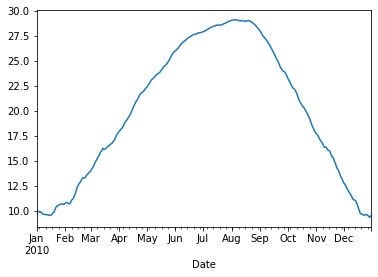

In [92]:
((dailies['Temperature']-32)*5/9).plot()

In [93]:
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [104]:
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
# svc = SVC()
# knn = KNeighborsClassifier()
# rf = RandomForestClassifier()

In [97]:
y = mpg['origin']
X = mpg.drop(['name', 'origin'], axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [101]:
Xtr, Xt, ytr, yt = train_test_split(X,y, train_size=0.8)

In [102]:
svc.fit(Xtr, ytr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
svc.score(Xt, yt)

0.6708860759493671

In [123]:
from collections import defaultdict

In [124]:
d = defaultdict(list)

In [126]:
d['a'].append(10)
d

defaultdict(list, {'a': [10]})

In [127]:
def compare(clfs, frac=0.8):
    scores = defaultdict(list)
    
    for _ in range(10):
        Xtr, Xt, ytr, yt = train_test_split(X,y, train_size=frac)

        for clf in clfs:
            model = clf()
            model.fit(Xtr, ytr)
            score = model.score(Xt, yt)
            scores[clf.__name__].append(score)
            
    return scores

In [128]:
compare([KNeighborsClassifier, SVC, RandomForestClassifier])

defaultdict(list,
            {'KNeighborsClassifier': [0.6962025316455697,
              0.6835443037974683,
              0.7215189873417721,
              0.7215189873417721,
              0.7341772151898734,
              0.7468354430379747,
              0.6329113924050633,
              0.7341772151898734,
              0.7341772151898734,
              0.7468354430379747],
             'SVC': [0.6455696202531646,
              0.620253164556962,
              0.6329113924050633,
              0.7088607594936709,
              0.7341772151898734,
              0.7341772151898734,
              0.6582278481012658,
              0.6835443037974683,
              0.7088607594936709,
              0.7341772151898734],
             'RandomForestClassifier': [0.8481012658227848,
              0.8227848101265823,
              0.810126582278481,
              0.8607594936708861,
              0.8860759493670886,
              0.8481012658227848,
              0.810126582278481,
        

In [129]:
scores = _

In [130]:
sum(scores['RandomForestClassifier'])/10

0.8518987341772151

In [131]:
sum(scores['SVC'])/10

0.6860759493670887

In [132]:
sum(scores['KNeighborsClassifier'])/10

0.7151898734177216

In [ ]:
RandomForestClassifier()

In [200]:
svc = SVC(C=10000)

In [223]:
Xtr, Xt, ytr, yt = train_test_split(X,y, train_size=0.8)

svc.fit(Xtr, ytr)
svc.score(Xt, yt)

0.6835443037974683

In [224]:
def compare(params, repeat=10):
    svc = SVC(**params)
    scores = []
    
    for _ in range(repeat):
        Xtr, Xt, ytr, yt = train_test_split(X,y, train_size=0.8)

        svc.fit(Xtr, ytr)
        score = svc.score(Xt, yt)
        scores.append(score)
        
    return scores

In [237]:
scores10000 = compare({'C': 10000}, 100)

In [229]:
scores100 = compare({'C': 100}, 100)

In [230]:
scores1 = compare({'C': 1}, 100)

In [232]:
import seaborn as sns

In [238]:
scores = pd.DataFrame({'scores10000': scores10000, 'scores100': scores100, 'scores1': scores1})
scores

,scores10000,scores100,scores1
0,0.797468,0.696203,0.721519
1,0.746835,0.746835,0.734177
2,0.759494,0.721519,0.708861
3,0.759494,0.734177,0.607595
4,0.784810,0.734177,0.670886
...,...,...,...
95,0.797468,0.746835,0.632911
96,0.708861,0.734177,0.670886
97,0.784810,0.658228,0.746835
98,0.797468,0.708861,0.721519


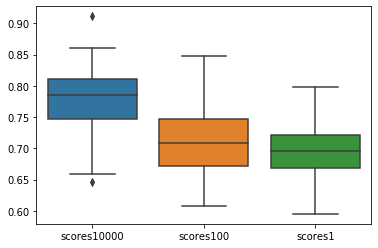

In [239]:
sns.boxplot(data=scores)

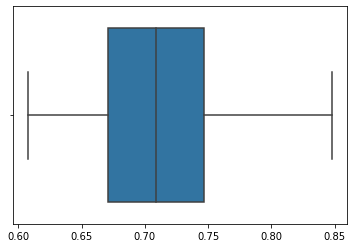

In [233]:
sns.boxplot(scores100)

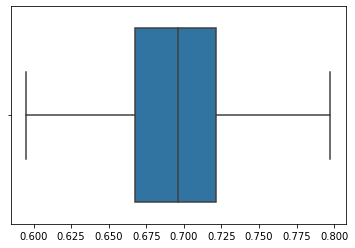

In [234]:
sns.boxplot(scores1)

In [277]:
%%time
scores_kernel_linear = compare({'kernel': 'linear'}, 100)

CPU times: user 6min 48s, sys: 1.29 s, total: 6min 50s
Wall time: 6min 54s


In [270]:
svc = SVC(kernel='poly', degree=3)

In [271]:
%%time
svc.fit(Xtr, ytr)

CPU times: user 6.4 ms, sys: 2.14 ms, total: 8.54 ms
Wall time: 12.7 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [272]:
%%time
svc.score(Xt, yt)

CPU times: user 2.44 ms, sys: 851 µs, total: 3.3 ms
Wall time: 2.43 ms


0.6582278481012658

In [273]:
scores_kernel_poly3 = compare({'kernel': 'poly', 'degree': 3}, 100)

In [274]:
scores_kernel_poly3

[0.6582278481012658,
 0.6708860759493671,
 0.6962025316455697,
 0.6708860759493671,
 0.7215189873417721,
 0.7341772151898734,
 0.6455696202531646,
 0.6329113924050633,
 0.620253164556962,
 0.7341772151898734,
 0.7088607594936709,
 0.6962025316455697,
 0.7215189873417721,
 0.7088607594936709,
 0.6962025316455697,
 0.620253164556962,
 0.6455696202531646,
 0.7468354430379747,
 0.7215189873417721,
 0.6455696202531646,
 0.6075949367088608,
 0.620253164556962,
 0.6455696202531646,
 0.6075949367088608,
 0.5822784810126582,
 0.6708860759493671,
 0.6962025316455697,
 0.620253164556962,
 0.6835443037974683,
 0.7341772151898734,
 0.6708860759493671,
 0.7974683544303798,
 0.7088607594936709,
 0.6582278481012658,
 0.7341772151898734,
 0.7721518987341772,
 0.6455696202531646,
 0.7341772151898734,
 0.7215189873417721,
 0.5949367088607594,
 0.6455696202531646,
 0.6835443037974683,
 0.6962025316455697,
 0.7848101265822784,
 0.6708860759493671,
 0.7088607594936709,
 0.5822784810126582,
 0.70886075949367

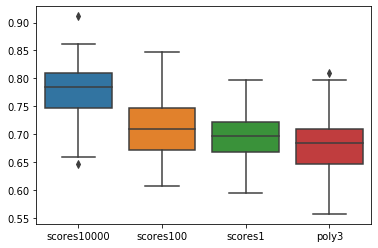

In [276]:
scores['poly3'] = scores_kernel_poly3
sns.boxplot(data=scores)

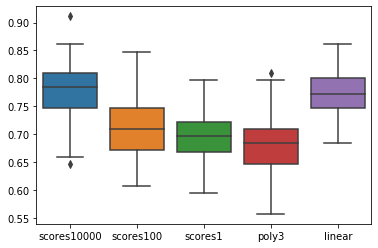

In [278]:
scores['linear'] = scores_kernel_linear
sns.boxplot(data=scores)

In [279]:
from sklearn.model_selection import GridSearchCV

In [287]:
gs = GridSearchCV(SVC(), 
             {
                 'C': np.arange(10,1000,100),
                 'kernel': ['rbf', 'poly'],
                 'gamma': ['scale', 'auto'],
                 'coef0': np.arange(0,1,0.1)
             }
            )

In [ ]:
%%time
gs.fit(X, y)

In [284]:
best_model = gs.best_estimator_

In [285]:
best_model

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)